In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

In [9]:
x = np.linspace(-np.pi,np.pi,500)

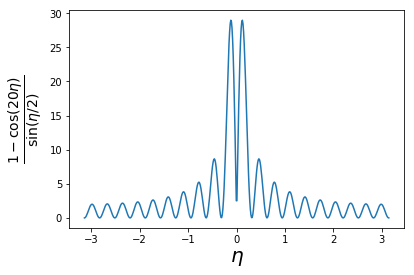

In [10]:
plt.plot(x, (1-np.cos(20*x))/np.abs(np.sin(x/2)), label = 'x1')
plt.xlabel(r'$\eta$', fontsize = 20)
plt.ylabel(r'$\frac{1-\cos(20\eta)}{\sin(\eta/2)}$', fontsize=20)

The expression derived for the structure factor is

$$
\begin{equation}
\begin{split}
\langle 0\rvert \rho_q \rho_{-q} \lvert 0\rangle = \sum_{j,k=1}^N &\exp(iqa[j-k])\\
&\times\exp\left(-\frac{q^2}{2mN}\sum_{|n| \leq (N-1)/2} \frac{1-\cos\left(\eta_n[j-k]\right)}{\omega(\eta_n)}\right).
\end{split}
\end{equation}
$$

For a chain of $N$ sites we have $q=2\pi r/N$ for integer $r$. We then have

$$
\begin{equation}
\begin{split}
\langle 0\rvert \rho_r \rho_{-r} \lvert 0\rangle = N\sum_{j=1}^N &\exp(2\pi i r j/N)\\
&\times\exp\left[-\frac{1}{N}\left(\frac{\pi r\ell_\text{osc.}}{Na}\right)^2\sum_{|n| \leq (N-1)/2} \frac{1-\cos\left(\eta_nj\right)}{|\sin\eta_n/2|}\right].
\end{split}
\end{equation}
$$

We can see that the dimensionless parameter governing the strength of the quantum fluctuations is $\ell_\text{osc.}/a$.

In [41]:
def exponent(N_odd, r, j, ℓ):
    η = np.arange(1,(N_odd + 1)/2) * 2 * np.pi / N_odd
    return 2 * (np.pi * r * ℓ)**2 / N_odd**3 * np.sum((1-np.cos(η * j)) / np.sin(η/2)) 
    ## Factor of two, for positive and negative η

In [88]:
def structure_factor(N_odd, r, ℓ):
    ks = np.arange(1,N_odd+1)
    sr = 0
    for k in ks:
        sr += np.exp(2j*np.pi*r*k/N_odd) * np.exp(-exponent(N_odd, r, k, ℓ))
    return sr

/Users/austenlamacraft/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


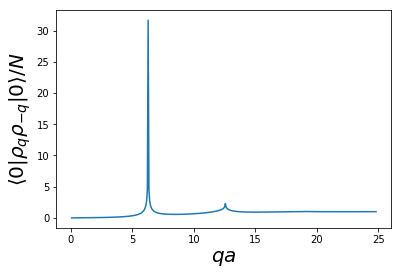

In [89]:
rs = np.arange(1, 400)
N = 101
plt.plot(2*np.pi* rs/N, structure_factor(N, rs, 0.2), label = 'x1')
plt.xlabel(r'$qa$', fontsize = 20)
plt.ylabel(r'$\langle 0| \rho_q \rho_{-q} | 0\rangle/N$', fontsize=20)

/Users/austenlamacraft/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


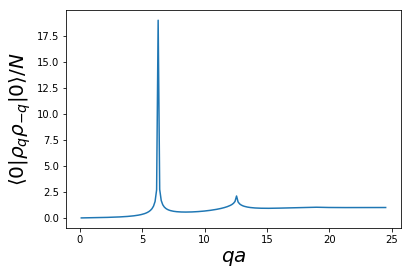

In [90]:
rs = np.arange(1, 200)
N = 51
plt.plot(2*np.pi* rs/N, structure_factor(N, rs, 0.2), label = 'x1')
plt.xlabel(r'$qa$', fontsize = 20)
plt.ylabel(r'$\langle 0| \rho_q \rho_{-q} | 0\rangle/N$', fontsize=20)